# Student Loan Risk with Deep Learning with Added Performance Improvements and Feature Reduction






In [24]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

---

## Prepare Data for use in Neural Network Model

### Read  `student-loans.csv` file into Pandas DataFrame, Review the DataFrame. Identify cols for features and target variables.   

In [25]:
# Read the csv into a Pandas DataFrame, Review the DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

display(loans_df.head())
# Review the data types associated with the columns
display(loans_df.dtypes)

# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

1    855
0    744
Name: credit_ranking, dtype: int64

In [26]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

1    855
0    744
Name: credit_ranking, dtype: int64

### Take preprocessed data and Create the features (`X`) and target (`y`) datasets (“credit_ranking”). 

In [27]:
# Define target set y using credit_ranking column; display a sample of y
y = loans_df["credit_ranking"]
display(y[:5])

0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

In [28]:
# Define features set X by selecting all columns but credit_ranking
X = loans_df.drop(columns=["credit_ranking"])

# Review the features DataFrame
display(X.head())

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Look for opportunities to reduce/simplify the data, using Feature Importance, Correlation Data

1. Feature Importance: Featires with low importance
2. Irrelevant Features
3. Features that might cause Data Leakage
4. Highly corrlated features

'feature_importances:'

,Feature,Importance
0,financial_aid_score,17.798048
1,total_loan_score,13.169340
2,location_parameter,11.023276
3,time_to_completion,10.026925
4,finance_workshop_score,9.111746
5,alumni_success,7.580250
6,payment_history,6.680522
7,stem_degree_score,6.549199
8,cohort_ranking,6.541730
9,study_major_code,5.872282


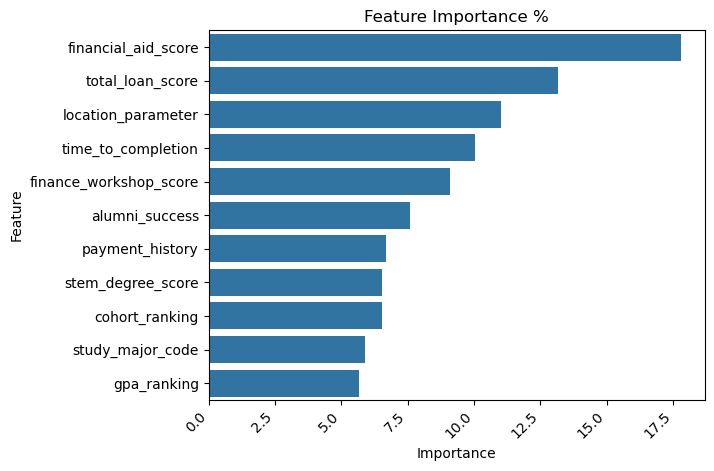

None

'Feature columns below 5%? '

Series([], Name: Feature, dtype: object)

In [29]:
#reduce

# Check Feature Importance using a RandomForest model.

# Train RandomForest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_ * 100  # get in %
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.reset_index(inplace=True, drop=True)
display("feature_importances:", (feature_importances))

# Plot Seaborn bar chart of feature importance:
import seaborn as sns
import matplotlib.pyplot as plt
bar_plot = sns.barplot(data=feature_importances, x='Importance', y='Feature')
bar_plot.set_title("Feature Importance %")
# Rotate the x-axis labels
plt.xticks(rotation=45, horizontalalignment='right')
display(plt.show())


# Identify Features to drop with low importance
threshold = 5 # set at 5%
to_drop = feature_importances[feature_importances['Importance'] < threshold]['Feature']
display("Feature columns below 5%? ", to_drop)

In [30]:
#reduce.

# Check and drop features that are likely IRRELEVANT
X_reduced = X.drop(columns=['location_parameter', 'alumni_success', 'study_major_code'])

# Drop features that might cause data leakage
X_reduced = X_reduced.drop(columns=['financial_aid_score'])

# reset X to the new X_reduced DF
X = X_reduced.copy()
display(X.head())

,payment_history,stem_degree_score,gpa_ranking,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score
0,7.4,0.00,1.9,34.0,0.9978,3.51,0.56
1,7.8,0.00,2.6,67.0,0.9968,3.20,0.68
2,7.8,0.04,2.3,54.0,0.9970,3.26,0.65
3,11.2,0.56,1.9,60.0,0.9980,3.16,0.58
4,7.4,0.00,1.9,34.0,0.9978,3.51,0.56


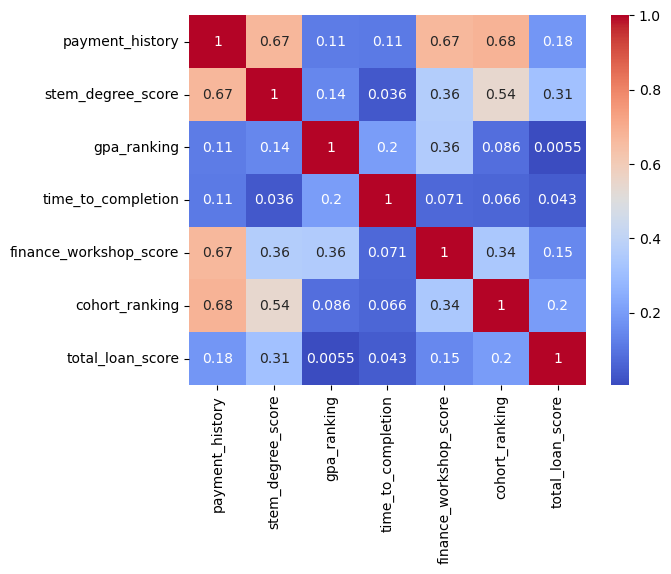

<Figure size 2000x4000 with 0 Axes>

'highly correlated data: []'

In [31]:
#reduce.

#  Look for highly Correlated data;

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X.corr().abs()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(40)
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(f'highly correlated data: {high_corr}')

# df.drop(columns=to_drop, inplace=True)

### Dropped features:
1. Feature Importance: Featires with imprtance < 5%: none found.
2. Irrelevant Features: 'location_parameter', 'alumni_success', 'study_major_code'
3. Features that might cause Data Leakage: 'financial_aid_score'
4. Highly corrlated features: none found.

In [32]:
# drop(columns=["credit_ranking", 'location_parameter', 'alumni_success', 'study_major_code', 'financial_aid_score'])
display(X.head())
display(y[:5], y.value_counts())

,payment_history,stem_degree_score,gpa_ranking,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score
0,7.4,0.00,1.9,34.0,0.9978,3.51,0.56
1,7.8,0.00,2.6,67.0,0.9968,3.20,0.68
2,7.8,0.04,2.3,54.0,0.9970,3.26,0.65
3,11.2,0.56,1.9,60.0,0.9980,3.16,0.58
4,7.4,0.00,1.9,34.0,0.9978,3.51,0.56


0    0
1    0
2    0
3    1
4    0
Name: credit_ranking, dtype: int64

1    855
0    744
Name: credit_ranking, dtype: int64

### Split the X features, y target sets Training and Test Datasets.

In [33]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)

### Use scikit-learn `StandardScaler` to scale features data.

In [34]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit/train the scaler to the features training dataset
scaler.fit(X_train)

# Scale the X train and X test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

## Compile and Evaluate a Model Using a Neural Network

### Create a deep neural network 
Assign the number of input features, layers, neurons for each layer using Tensorflow’s Keras.

Start with 2-layer deep neural network model, `relu` activation function for both layers.

In [35]:
# Define the the number of inputs (features) to the model
feature_count = len(X.columns)

# Review the number of features
print(f"no. features: {feature_count};\ncols: {X.columns}")

no. features: 7;
cols: Index(['payment_history', 'stem_degree_score', 'gpa_ranking',
       'time_to_completion', 'finance_workshop_score', 'cohort_ranking',
       'total_loan_score'],
      dtype='object')


In [36]:
# Define the model:
# + number of neurons/hidden nodes for the hidden layers
hidden_nodes_layer_1 = 32 # up from 10
hidden_nodes_layer_2 = 16 # up from 5
neurons_output_layer = 1

# Create the Keras Sequential model instance, add layers (layer one includes input layer)
nn_model = Sequential()
nn_model.add(Dense(units=hidden_nodes_layer_1, activation="relu", input_dim = feature_count))
nn_model.add(Dense(units=hidden_nodes_layer_2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Display the Sequential model summary/Check the structure of the model
nn_model.summary()

c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and fit the Sequential model using `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

In [38]:
# Compile the Sequential model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
# Fit/Train the model using 200 epochs and the training data

# The epoch runs are all Training...see these accuracy values for overfit tendencies
# Save model_fit History object to graph below to see trends of accuracy and loss over the Epochs.

# nn_model.fit(X_train_scaled, y_train, epochs=100) #, validation_split=0.2)

# Use for plotting Epochs vs. Loss, Accuracy below
model_fit_history = nn_model.fit(X_train_scaled, y_train, epochs=200) #, validation_split=0.2)

# wab 2024.09.15 originally tried 50, then 100 epochs, but determined from Graph that 25 was more optimal.

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5218 - loss: 0.7203
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.6337 - loss: 0.6733
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.6909 - loss: 0.6340
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.6685 - loss: 0.6143
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.7057 - loss: 0.5911
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.6944 - loss: 0.5685
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7048 - loss: 0.5632
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.7107 - loss: 0.5471
Epoch 9/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6950 - loss: 0.5553
Epoch 10/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.7302 - loss: 0.5248
Epoch 11/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7090 - loss: 0.5325
Epoch 12/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 95

### Evaluate the model using the test data to determine the model’s loss and accuracy.
Plot Epoch vs. Loss; Epoch vs. Accuracy to determine optimized number of epochs for training.

In [40]:
# Evaluate the model using the test data:
# Determine model loss and accuracy metrics using the evaluate method on the test data

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 10ms/step - accuracy: 0.7600 - loss: 0.5143
Loss: 0.5142790079116821, Accuracy: 0.7599999904632568


,accuracy,loss
1,0.541284,0.704692
2,0.661384,0.656148
3,0.685571,0.630790
4,0.688073,0.606921
5,0.703086,0.586662


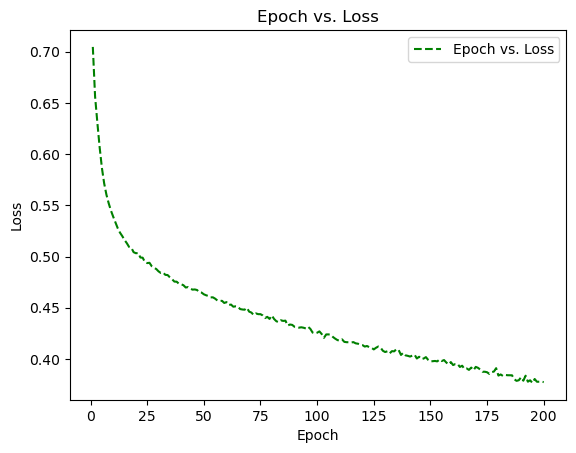

None

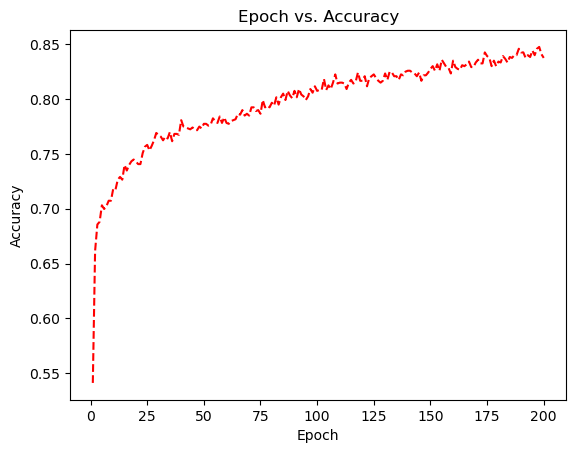

None

In [42]:
##############################
#  Use  to plot Epoch vs. Loss; Epoch vs. Accuracy to deteremine optimal # of Epochs.
##############################

# Create DataFrame of the model_fit_history and plot
# Epochs vs. the Accuracy and Loss to see where it planes out.

# Create a DataFrame containing training history
history_df = pd.DataFrame(model_fit_history.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Inspect history df
display(history_df.head())

import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_df.index, history_df['loss'], label='Epoch vs. Loss', color='g', linestyle='--')
plt.title('Epoch vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
display(plt.show())

# simple dataframe plot:
# history_df.plot(y="loss")

# Plot the accuracy
plt.plot(history_df.index, history_df['accuracy'], label='Epoch vs. Accuracy', color='r', linestyle='--')
plt.title('Epoch vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
display(plt.show())

# simple dataframe plot:
# history_df.plot(y="accuracy")

In [43]:
##############################
#  Use for K-Fold Cross-Validation to ensure model generalizes well to unseen data
##############################

#reduce.  #perform.

# K-Fold Cross-Validation

from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the model creation function
def create_model():
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=feature_count))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

# Define the K-Fold Cross-Validator
kfold = KFold(n_splits=5, shuffle=True, random_state=13)

# Evaluate the model using K-Fold Cross-Validation
results = cross_val_score(model, X_train_scaled, y_train, cv=kfold)
print(f"Cross-Validation Accuracy: {results.mean()} (+/- {results.std()})")

c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass a

Cross-Validation Accuracy: 0.7281276150627616 (+/- 0.022188246449241698)


### Cross-Validation Accuracy: 0.7281276150627616 (+/- 0.022188246449241698)

In [44]:
# RE-Fit/Train model using 100 epochs (based on Epoch v Loss, Accuracy curves) and the training data

# The epoch runs are all Training...see these accuracy values for overfit tendencies
nn_model.fit(X_train_scaled, y_train, epochs=100) #perform, validation_split=0.2

#perform
# wab/2024.09.15 originally tried 50, then 200. determined from Graph that ~100 was more optimal

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.3661
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8455 - loss: 0.3888
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8328 - loss: 0.3900
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8421 - loss: 0.3850
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.8432 - loss: 0.3704
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8255 - loss: 0.3967
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.8509 - loss: 0.3578
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8501 - loss: 0.3701
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8283 - loss: 0.3797
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8420 - loss: 0.3731
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681 - loss: 0.3674
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 931u

### Evaluate the model using the test data using evaluate() method.

In [46]:
# Evaluate the model loss and accuracy metrics using evalue() method on the test data:

model_loss, model_accuracy = nn_model.evaluate(X_test_scaled , y_test, verbose=2)

# Display evaluation results (model loss and accuracy):
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 - 0s - 4ms/step - accuracy: 0.7450 - loss: 0.5620
Loss: 0.5620205998420715, Accuracy: 0.7450000047683716


# LOCAL DRIVE SAVE/RESTORE
### Next few steps are to Save and export the nn_model to local drive (as a keras file:  `student_loans.keras`)

In [49]:
# LOCAL DRIVE SAVE/RESTORE

nn_model.save('student_loans_perf.keras')

In [50]:
# LOCAL DRIVE SAVE/RESTORE
nn_imported = tf.keras.models.load_model('student_loans_perf.keras')

# GOOGLE MYDRIVE SAVE/RESTORE
### Next few steps are to Save and export the nn_model to Google MyDrive (as a keras file:  `student_loans.keras`)


In [325]:
# GOOGLE MYDRIVE SAVE/RESTORE

# Mount Google Drive
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')#  , force_remount=True

# List the contents of My Drive
print(os.listdir('/content/drive/My Drive/saved_models'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


In [326]:
# GOOGLE MYDRIVE SAVE/RESTORE

#  Set filepath to MyDrive saved_models and Save.
from pathlib import Path
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_perf.keras')

# Export your model to a keras file
nn_model.save(file_path)
print(os.listdir('/content/drive/My Drive/saved_models'))

['student_loans.keras', 'student_loans_perf.keras', 'student_loans_reduce.keras']


In [ ]:
# GOOGLE MYDRIVE SAVE/RESTORE

# Reload saved nn_model from Google MyDrive.

# Import the required libraries
import tensorflow as tf

print(os.listdir('/content/drive/My Drive/saved_models'))
# Set the model's file path
file_path = Path('/content/drive/My Drive/saved_models/student_loans_perf.keras')

# Load the model to a new object
nn_imported = tf.keras.models.load_model(file_path)

---
## Predict Loan Repayment Success Using Deep Learning / Neural Network Model

### Make predictions on the testing data and save the predictions to a DataFrame.

In [51]:
# Make predictions with the X test scaled data
# predictions = nn_model.predict(X_test_scaled,  verbose=2)
predictions = nn_imported.predict(X_test_scaled, verbose=2)

# Display a sample of the predictions
predictions[:10]

13/13 - 0s - 5ms/step


array([[0.81165576],
       [0.47473577],
       [0.14990385],
       [0.9044861 ],
       [0.40693915],
       [0.692001  ],
       [0.16904375],
       [0.9885524 ],
       [0.00829854],
       [0.75827533]], dtype=float32)

In [53]:
# Save the predictions to a DataFrame and round the predictions to binary results
df_preds = pd.DataFrame(predictions, columns=['Prediction']) #convert numpy array to DataFrame.
df_preds_binary = df_preds.applymap(lambda x: 1 if x > 0.5 else 0)

display(df_preds_binary.value_counts())
display(df_preds_binary.head())
display(df_preds_binary.tail())

Prediction
1             210
0             190
dtype: int64

,Prediction
0,1
1,0
2,0
3,1
4,0


,Prediction
395,0
396,1
397,1
398,1
399,1


### Display classification report with y test data and predictions

In [55]:
# Print the classification report with the y test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, df_preds_binary))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       194
           1       0.75      0.76      0.75       206

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [ ]:
# #############################################################
#  --> Description of 'reduce/perform' model:----------------------------------
# student_loans_with_deep_learning_reduced.ipynb
# with previously added performance improvements:
#   -increased neuons of 1st and 2nd layers to 100/50
#   -reduced Epochs to 25, which appeared to be plateau for Accuracy/Loss
# + performing feature reduction
#   -remove unrelated columns
#   -removed data leak suspected column

#  --> Evaluation of 'reduce' model:----------------------------------

# The model performs well overall.  Overall accuracy of 79%
# Model performs similarly for both classes, with slightly better recall for class 1.
# Model is well-balanced (194 instances of Class 0, 206 instances of Class 1)
# and performs consistently across both classes

# NOTE: class 0 : bad credit risk; class 1: good credit risk


#  --> Details ------------------------------------------------
# Precision (predicted true results were actually true)
    # Class 0: 78% of the instances predicted as class 0 are actually class 0.
    # Class 1: 79%

# Recall/Sensitivity (actually true data points were identified correctly):
    # Class 0: model correctly identifies 78% of the actual class instances
    # Class 1: 79%
# F1-Score:
# balances sensitivity/recall and precision; harmonic mean of precision and recall
    # class 0: 0.78
    # class 1: 0.79

#  --> Data ------------------------------------------------
# 13/13 - 0s - 3ms/step - accuracy: 0.7850 - loss: 0.5954
# Loss: 0.5953590869903564, Accuracy: 0.7850000262260437

#               precision    recall  f1-score   support

#            0       0.78      0.78      0.78       194
#            1       0.79      0.79      0.79       206

#     accuracy                           0.79       400
#    macro avg       0.78      0.78      0.78       400
# weighted avg       0.79      0.79      0.79       400


# Training accuracy was 90.37% (model correctly predicts the training data),
# as seen in output in final Epoch of the Train/Fit of the model:
# Epoch 200/200
# 38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9037 - loss: 0.2567

# #############################################################
# NOTES: reading Accuracy scores
    # Accuracy:  all the things you got right over everything
    # Sensitivity/Recall: how many actually true data points were identified correctly.
    # Specificity: how many actually false data points were identified correctly
    # Precision: how many predicted true results were actually true
    # F1 score balances sensitivity/recall and precision


---
## Recommendation system for student loanss

To build a recommendation system to recommend student loan options for students, candidates
would need to provide history of payments (of other loans), their address/location, grades, 
ranking, major, time to complete their major, scores from the finance workshop, ranking in their cohort, 
financial aid scores (from the university?) and total loan score for any other loans taken.

The features used in this model include:
'payment_history', 'location_parameter', 'stem_degree_score',
'gpa_ranking', 'alumni_success', 'study_major_code', 'time_to_completion',
'finance_workshop_score', 'cohort_ranking', 'total_loan_score', 'financial_aid_score'

This recommendation model would be a hybrid of content and context-based filtering.
  +  Content-based filtering leverages the attributes of each candidate to make recommendations.  We have this data: grades, major, financial score.
  +  Context-based filtering considers the context in which the recommendation is made.  We have data such as location and history of payments.
  +  Collaborative filtering is based on user interactions or preferences and is not available in this dataset.

Most of this data is highly sensitive: financial, grades, location, etc. Use of the data would require consent and would have to be handled/maintained carefully.  
Financial aid applications might contain information about race/gender, which would be sensitive information to use to determine if a loan will be granted.  Using attribues like race/gender, and even major and financial aid might insert biases into the recommendation engine.

In [ ]:
# NOTES for README:

# Create a deep neural network using Tensorflow's Keras model to predict student loan repayment
# CSV file contains information about previous student loan recipients

#   * Prepare the data for use on a neural network model.
#   * Compile and evaluate a model using a neural network.
#   * Predict loan repayment success with the neural network model
#   * Discuss recommendation system for student loans

# Prepare the data, including splitting and scaling.  The target dataset: “credit_ranking” column

    #   Define, create and compile the Neural Network model.
    #   Define the the number of inputs (features) to the model
    #   Define the number of neurons/hidden nodes
    #   Create the Keras Sequential model instance
    #   Add input layers and output layer
    #   Display the Sequential model summary and inspect the structure of the model
    #   Compile the Sequential model
    #   Fit the model using 50 epochs and the training data


    # Student Loan Risk with Deep Learning, With Attempted Performance Improvements and Feature Reduction

# Reduce the number of features by excluding columns that are suspected to be
# unrelated to the target/outcome, as well as a column that could be causing data leakage.

# Number of features is reduced to 7



### ALL CELLS AFTER THIS POINT NOT USED

In [ ]:
#reduce.

# #######################
#   NOT USED
# #######################

# use SHAP (SHapley Additive exPlanations) to determine importance of each feature
#   for the Neural Network;
# compare against earlier calculated RandomForest feature importance

import shap

# # Train the model
# nn_model.fit(X_train_scaled, y_train, epochs=50, verbose=0)

# Using shap.sample randomly samples K background data points.
# Quick and simple way to reduce the number of background samples.
# background = shap.sample(X_train_scaled, K=100)  # Sample 100 background data points

# Using shap.kmeans uses K-means clustering to summarize the background data into K clusters.
# More sophisticated approach that captures the diversity of the background data through clustering.
background = shap.kmeans(X_train_scaled, k=10)  # Summarize background data into 10 clusters

# Create a SHAP explainer
# Replace X_train_scaled with background to use approximations
explainer = shap.KernelExplainer(nn_model.predict, background) # background X_train_scaled

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_scaled)

# Plot the SHAP values
plt.figure(figsize=(12, 8))  # Increase the plot size
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_size=(12, 8), show=False)
# shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

plt.title("SHAP Summary Plot", fontsize=16)  # Increase title font size
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=14)  # Increase x-axis label font size
plt.ylabel("Feature", fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size

# WARNING:  shap:  Using 1199 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples

In [ ]:
# Plot the SHAP values
plt.figure(figsize=(12, 8))  # Increase the plot size
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_size=(12, 8), show=False)
# shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

plt.title("SHAP Summary Plot", fontsize=16)  # Increase title font size
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=14)  # Increase x-axis label font size
plt.ylabel("Feature", fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=12)  # Increase x-axis tick font size
plt.yticks(fontsize=12)  # Increase y-axis tick font size